**PUPRPOSE OF THE PROJECT**

The goal of the project is to analyze the data and create a model that could predict the range of math test scores. 

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [56]:
df = pd.read_csv("exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [57]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [58]:
for column in df.columns:
    unikalne_wartosci = df[column].unique()
    print(f'{column}:\n {unikalne_wartosci}')

gender:
 ['female' 'male']
race/ethnicity:
 ['group D' 'group B' 'group C' 'group E' 'group A']
parental level of education:
 ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
lunch:
 ['standard' 'free/reduced']
test preparation course:
 ['completed' 'none']
math score:
 [ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]
reading score:
 [ 70  93  76  85  57  83  61  75  69  50  74  73  54  46  47  92  82  71
  66  88  52  79  87  81  78  35  53  56  77  72  67  64  86  68  34  91
  62  33  58  49  80  89  97  65  51  96  84  90  95  55  60  99  45  63
  98  40  94  59  48  25  39  43  44  27 100  42  30  32  38  41  37]
writing score:
 [ 78  87  77  63  86  54 

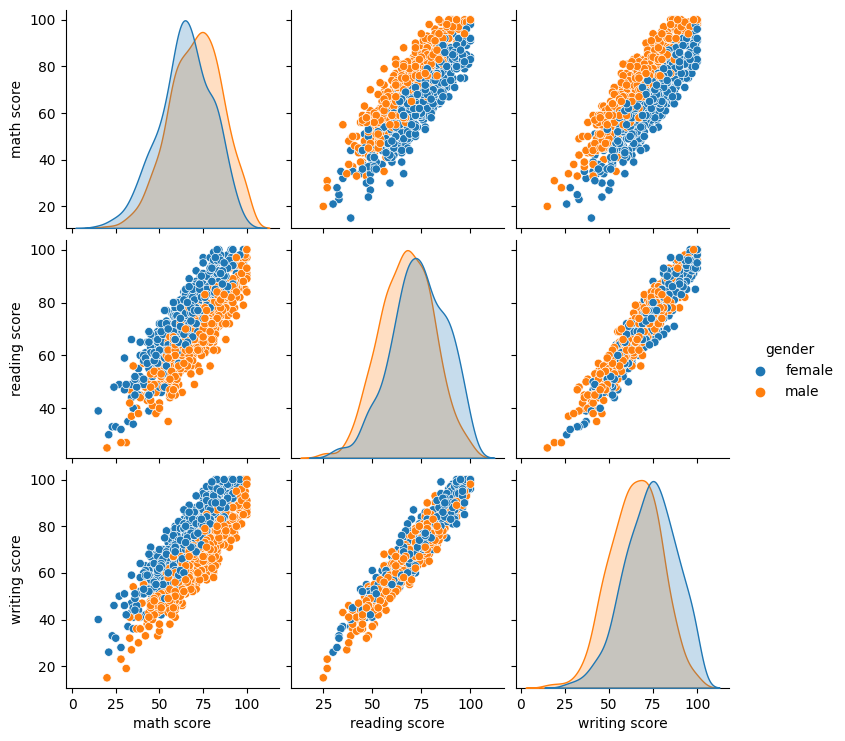

In [59]:
sns.pairplot(df,hue='gender')

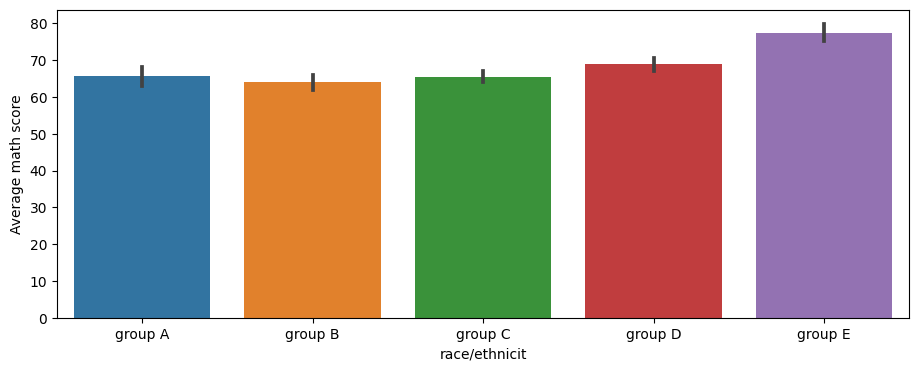

In [60]:
barplot = sns.barplot(x = "race/ethnicity", y = "math score", data = df, 
                      order=['group A', 'group B', 'group C', 'group D', 'group E' ])
barplot.figure.set_size_inches(11, 4)
barplot.set(xlabel = "race/ethnicit", ylabel = "Average math score")

plt.show()

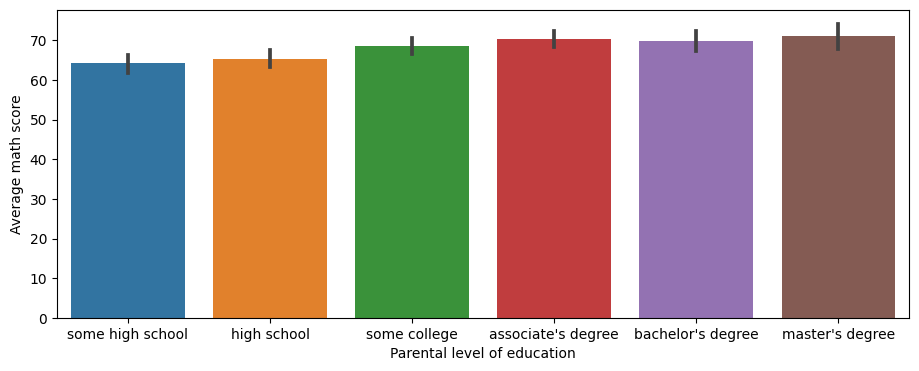

In [61]:
barplot = sns.barplot(x = "parental level of education", y = "math score", data = df, 
                      order=['some high school','high school','some college',
                             "associate's degree", "bachelor's degree", "master's degree" ])
barplot.figure.set_size_inches(11, 4)
barplot.set(xlabel = "Parental level of education", ylabel = "Average math score")

plt.show()


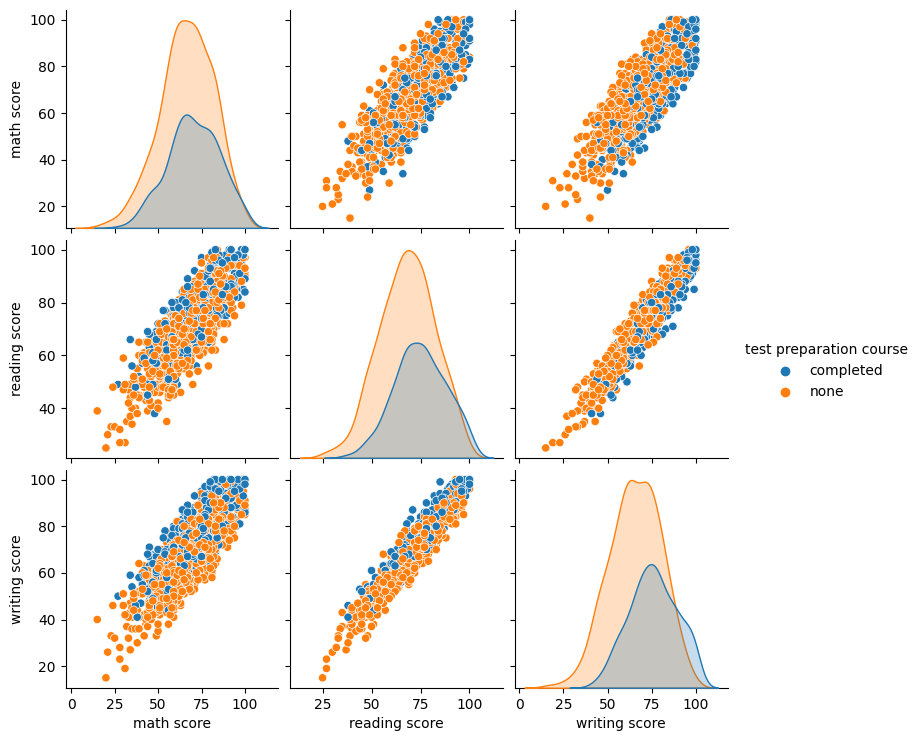

In [62]:
sns.pairplot(df,hue='test preparation course')

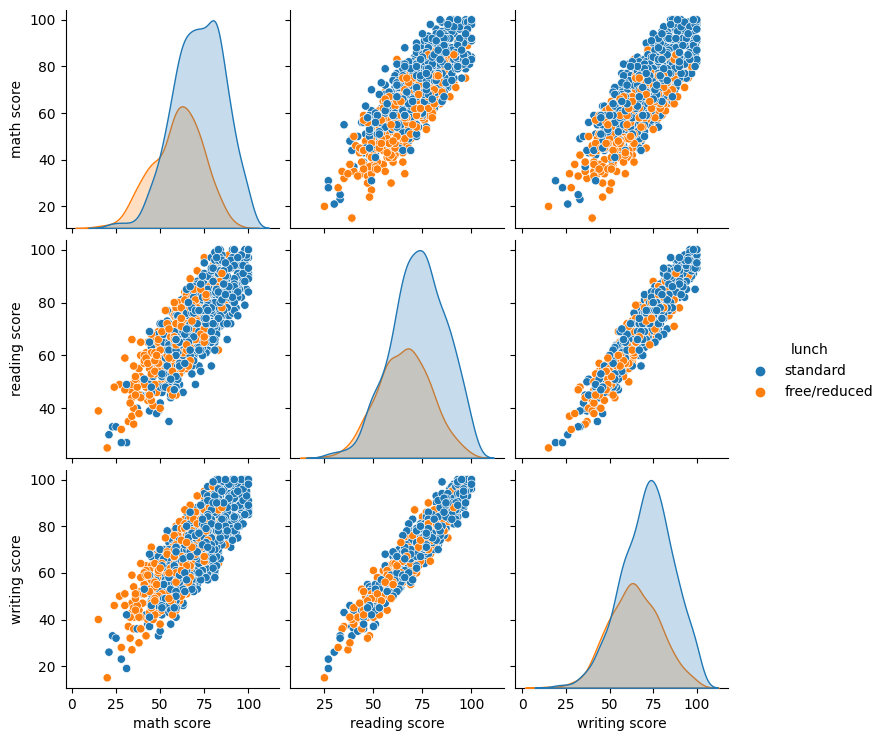

In [63]:
sns.pairplot(df,hue='lunch')

In [64]:
df_numbers = pd.DataFrame()

excluded_cols = ['math score', 'writing score', 'reading score']

for col in df.columns:
  if col not in excluded_cols:
    df_numbers[col] = pd.Series(pd.factorize(df[col])[0], dtype=int)
  else:
    df_numbers[col] = df[col]

X = df_numbers
X = X.drop("math score", axis="columns")

y = round((df_numbers["math score"])/20)*20        # division into 6 groups

X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,0,0,0,0,70,78
1,1,0,1,0,1,93,87
2,0,0,0,1,1,76,77
3,1,1,0,1,1,70,63
4,0,0,1,0,1,85,86


In [65]:
y.unique() # groups = 0, 20, 40, 60, 80, 100

array([ 60., 100.,  80.,  40.,  20.])

Text(0.5, 1.0, 'Correlation Heatmap')

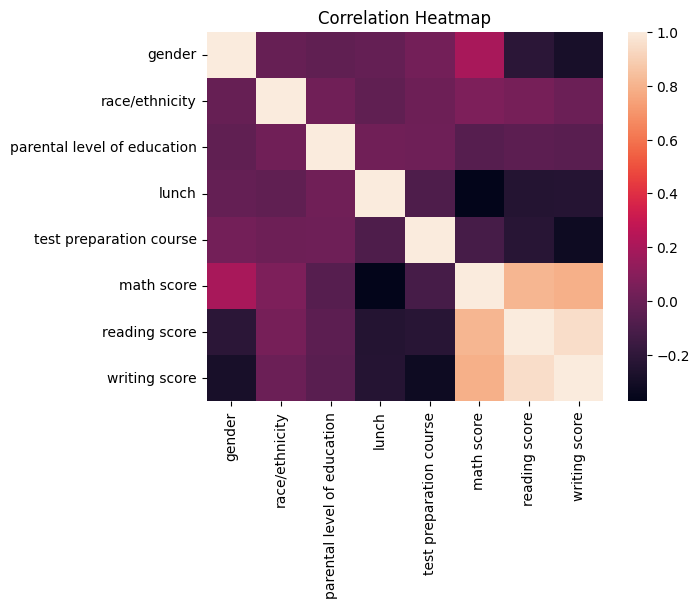

In [66]:
heatmap=sns.heatmap(df_numbers.corr())
heatmap.set_title('Correlation Heatmap')

In [67]:
# looking for the best model

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'gamma': [0.1,0.5,1],
            'kernel': ['linear', 'rbf']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20]
        }
    },
    'gaussian_naive_bayes ' : {
        'model': GaussianNB(),
        'params': {}
    },
    'multinomial_naive_bayes' : {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree_classifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss']
        }
    }
}


scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
sol = pd.DataFrame(scores,columns=['model','best_score','best_params'])
sol

,model,best_score,best_params
0,svm,0.782,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}"
1,random_forest,0.736,{'n_estimators': 20}
2,logistic_regression,0.730,{'C': 10}
3,gaussian_naive_bayes,0.580,{}
4,multinomial_naive_bayes,0.506,{}
5,decision_tree_classifier,0.668,{'criterion': 'log_loss'}


Score: 0.74


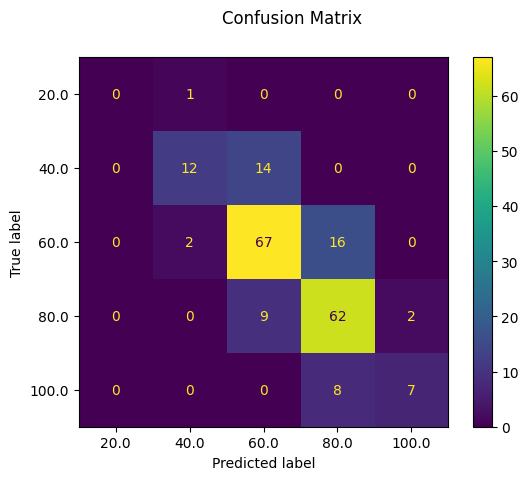

In [68]:
# the best one is cvm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC(C = 10, gamma = 0.1, kernel= 'linear')
model.fit(X_train, y_train)
sol = model.score(X_test, y_test)
print(f"Score: {sol}")

predicted = model.predict(X_test)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

The greatest correlation is seen in reading and writing scores to math scores. Other data can only support the model. Sometimes assignment to a particular group can be relatively difficult due to edge scores.